In [2]:
import numpy as np
import scipy.signal as ssig
import matplotlib.pyplot as plt
from scipy.fft import fft

In [3]:
## Utility function

def fft_plot(s, fs, name, plottitle, normalized_freq=False):
    """
    Plots the frequency domain representation (magnitude of FFT) of a discrete signal.

    :param s: signal (1D NumPy array)
    :param fs: Sampling frequency in Hz
    :param name: Name of the signal for labeling
    :param plottitle: Title of the plot
    :param normalized_freq: If True, normalize the frequency axis to [0, 1]
    """
    N = len(s)

    # Frequency axis
    f = np.linspace(0, fs, N)

    # Compute FFT
    s_f = fft(s)
    
    N = len(s_f)
    f_final = np.arange(0,N)/N if normalized_freq else f

    # Plot only frequency domain
    plt.figure(figsize=(10, 4))
    plt.plot(f_final, np.abs(s_f))
    plt.title(plottitle)
    plt.xlabel('f [Hz]')
    plt.ylabel('|' + name + '_F(f)|')
    plt.grid(True)
    plt.show()

In [4]:
## Simulated Data ##
rand = np.random.default_rng(42)

number_samples = 100
variance = 0.1
fs = 100

t_unevenly = np.array(sorted(100 * rand.random(number_samples)))
t_evenly = np.linspace(0, 1, fs)

# x(t) = sin(2 * pi * t / 100) + noise
# we sample the sinusoid at 100 points but unevenly
y_evenly = np.sin(2 * np.pi * t_evenly)  + variance * rand.standard_normal(number_samples)

# x(t) = sin(2 * pi * t / 100) + noise
# we sample the sinusoid at 100 points but unevenly
y_unevenly = np.sin(2 * np.pi * t_unevenly)  + variance * rand.standard_normal(number_samples)

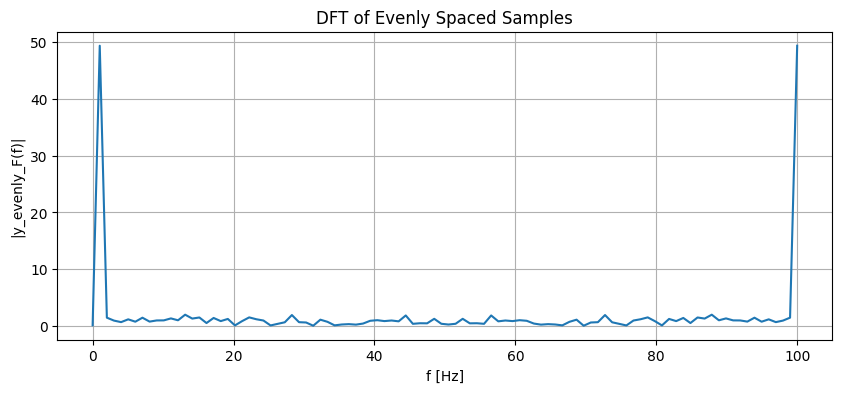

In [5]:
## Compute the DFT of the evenly sampled data ##

'''
The signal x(t) has a period of 1Hz 
We sample at 100Hz
The following plot shows the peak at f = 1
'''

fft_plot(y_evenly, fs, 'y_evenly', 'DFT of Evenly Spaced Samples', normalized_freq=False)

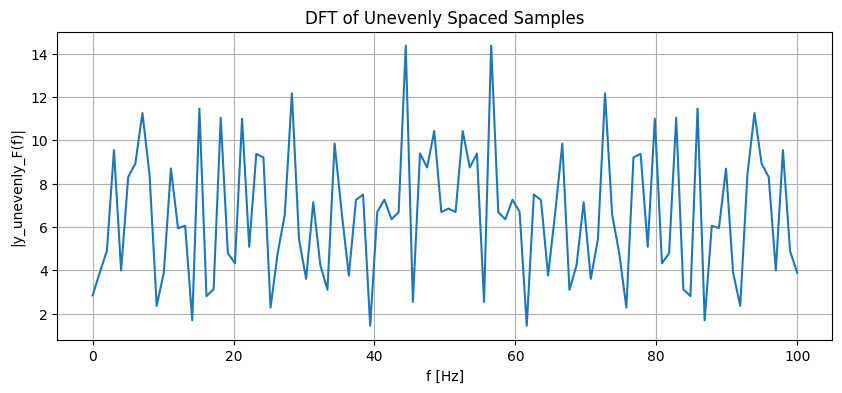

In [6]:
## Compute the DFT of the unevenly sampled data ##

'''
The signal x(t) has a period of 1Hz 
We sample at 100Hz
The following plot shows nothing interesting as expected

EXPLAIN IN REPORT THAT ITS EXPECTED FROM THE DEFINITION OF THE FT WITH UNEVENLY SPACED SAMPLES
'''

fft_plot(y_unevenly, fs, 'y_unevenly', 'DFT of Unevenly Spaced Samples', normalized_freq=False)

Text(0.5, 0, 'Frequency [Hz]')

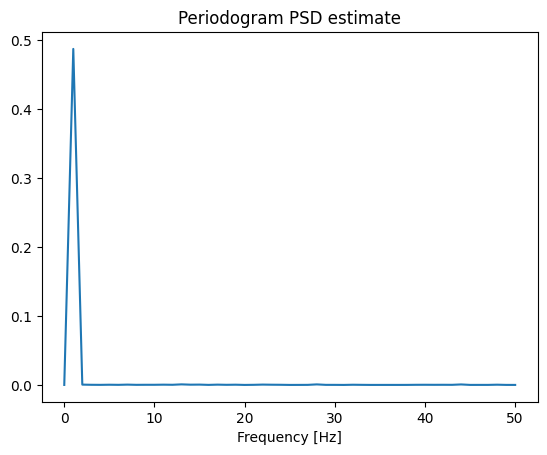

In [7]:
## Compute the Periodogram of the evenly sampled data ##

'''
The signal x(t) has a period of 1Hz 
We sample at 100Hz
The following plot shows the peak at f = 1
'''

freqs , Sper = ssig.periodogram(y_evenly, fs=fs, return_onesided=True)  
fig, ax = plt.subplots()
plt.plot(freqs, Sper)
ax.set_title("Periodogram PSD estimate")
ax.set_xlabel("Frequency [Hz]")

Text(0.5, 0, 'Frequency [Hz]')

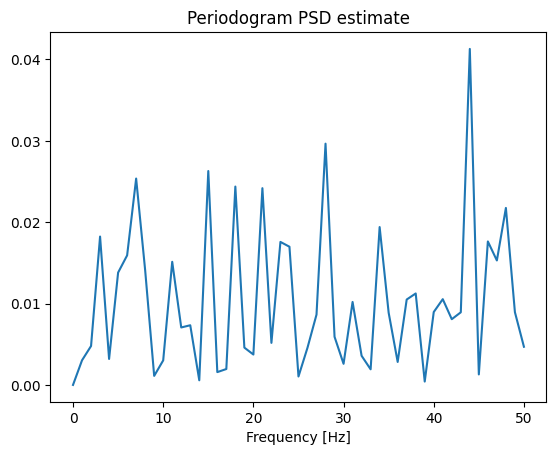

In [8]:
## Compute the Periodogram of the unevenly sampled data ##

'''
The signal x(t) has a period of 1Hz 
We sample at 100Hz
The following plot shows nothing interesting as expected
'''

freqs , Sper = ssig.periodogram(y_unevenly, fs=fs, return_onesided=True)  
fig, ax = plt.subplots()
plt.plot(freqs, Sper)
ax.set_title("Periodogram PSD estimate")
ax.set_xlabel("Frequency [Hz]")

# Real Data

In this section, we have been able to generate ECG signals and retrieve RR intervals from them using a real hardware. All information can be found in the PDF report 1. We load and compute the periodogram. 2 recordings have been made but for this report, only the second one is being shown, because it was better. To compute the RR intervals, we used a Python library called neurokit2. The script that handled that is `extract_rr.py`. The sampling frequency of the ECG signals is 250Hz.

Text(0, 0.5, 'Intensity')

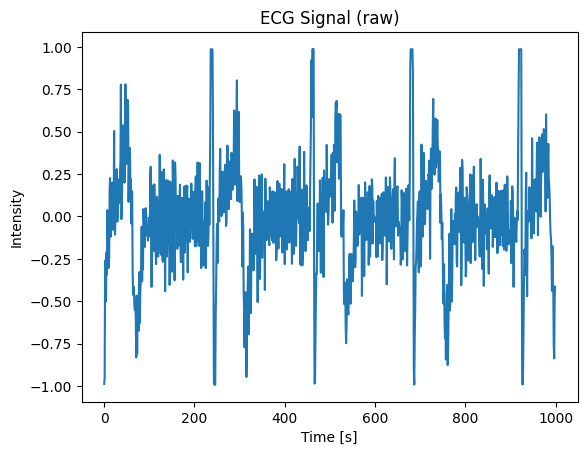

In [9]:
import neurokit2 as nk

fs_real = 250

RR_signal = np.load('RR-2.npy')
ecg_signal = np.genfromtxt('Roman-Recording-2.csv', delimiter=',')[1:]

# Size of the signal
N_ecg = ecg_signal.shape[0]

# Plot the signal without neurokit2
fig, ax = plt.subplots()
ax.set_title("ECG Signal (raw)")

# Remove very noisy samples
sample_start = 500
sample_end = N_ecg - 500

# Get the actual signal
eff_data = ecg_signal[sample_start: sample_end, 1]

plt.plot(eff_data[3000:4000])
plt.title("ECG Signal (raw)")
plt.xlabel('Time [s]')
plt.ylabel('Intensity')

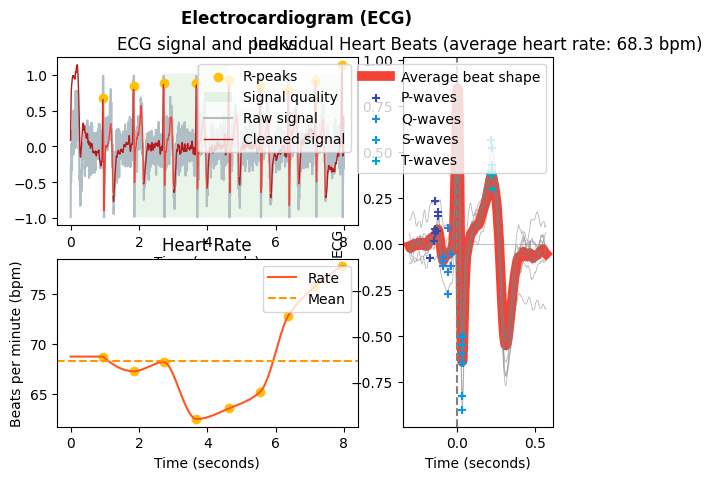

In [10]:
# plot the ECG signal with neurokit2
ecgs_plot, info_plot = nk.ecg_process(eff_data[3000:5000], fs_real)
ecgs, info = nk.ecg_process(eff_data, fs_real)

nk.ecg_plot(ecgs_plot, info_plot)
plt.show()

Mean of RR intervals:  0.8420616246498599
Standard deviation of RR intervals:  0.10546886970529425


Text(0, 0.5, 'Time [s]')

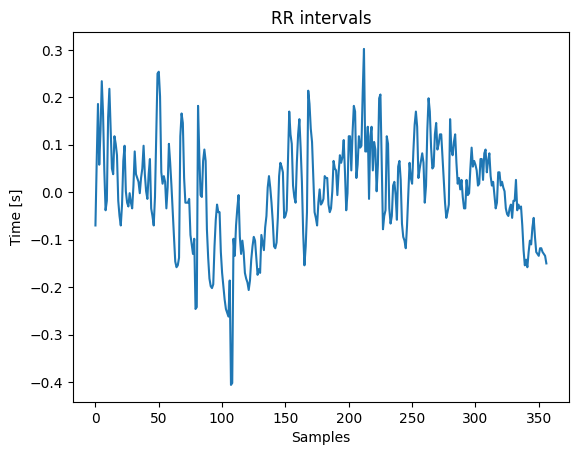

In [11]:
# plot the RR intervals

# Remove the DC component
mean=np.mean(RR_signal)
print("Mean of RR intervals: ", mean)
print("Standard deviation of RR intervals: ", np.std(RR_signal))
RR_signal=RR_signal-mean

fig, ax = plt.subplots()
ax.set_title("RR intervals")
plt.plot(RR_signal)
plt.title("RR intervals")
plt.xlabel('Samples')
plt.ylabel('Time [s]')

Maximum value at index: 1
Frequency at maximum index: 0.0028011204481792717


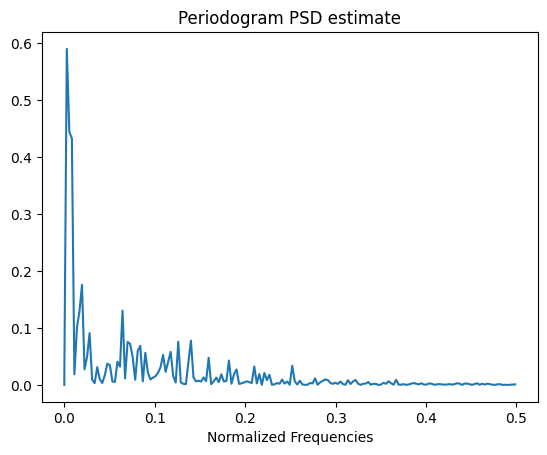

In [12]:
## Compute the Periodogram of the real data ##

'''
We plot in normamized frequencies as the argument fs has no meaning in this function. 
'''

freqs , Sper = ssig.periodogram(RR_signal, fs=1.0, return_onesided=True)  
fig, ax = plt.subplots()
plt.plot(freqs,Sper)
ax.set_title("Periodogram PSD estimate")
plt.xlabel('Normalized Frequencies')
print(f"Maximum value at index: {np.argmax(Sper)}")
print(f"Frequency at maximum index: {freqs[1]}")

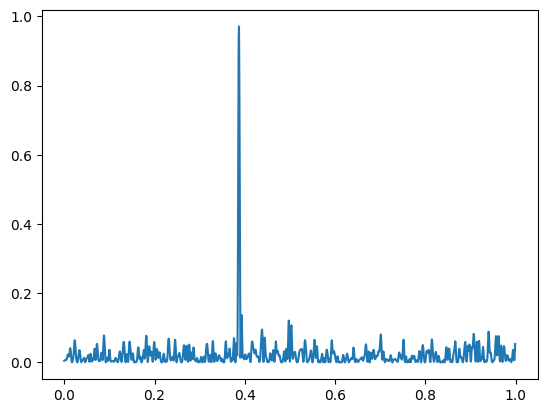

In [13]:
from astropy.timeseries import LombScargle

## Simulated Data
rand = np.random.default_rng(42)
t = np.array(sorted(100 * rand.random(100)))
#t = np.linspace(0, 1, 100)

# x(t) = sin(2 * pi * t / 100) + noise
# we sample the sinusoid at 100 points but unevenly
y = np.sin(2 * np.pi * t)  + 0.1 * rand.standard_normal(100)

# LombScargle periodogram
frequency, power = LombScargle(t, y).autopower()

N = len(power)
freqsNorm = np.arange(0,N)/N
plt.plot(freqsNorm, power) 

Maximum value: 0.30548524329332805
Maximum value at index: 6
Frequency at maximum index: 1.7342351356038473e-05


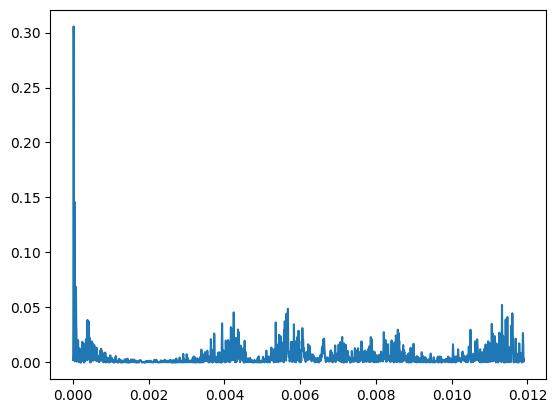

In [ ]:
time_R_peaks = info["ECG_R_Peaks"]

# LombScargle periodogram of R2 signal (centered)
frequency, power = LombScargle(time_R_peaks[1:], RR_signal).autopower()

'''
autopower() is explained in the documentation and computed a suitable frequency grid. By default, it
will return a grid with maximum frequency of 5 times the "average nyquist frequency" of the data, which is proven
in the paper that it's a not necessarily an optimal choice.
'''

N = len(power)
freqsNorm = np.arange(0,N)/N

print(f"Maximum value: {np.max(power)}")
print(f"Maximum value at index: {np.argmax(power)}")
print(f"Frequency at maximum index: {frequency[np.argmax(power)]}")

# zoom in on the first 300 points

plt.plot(frequency, power) 

Text(0, 0.5, 'Power')

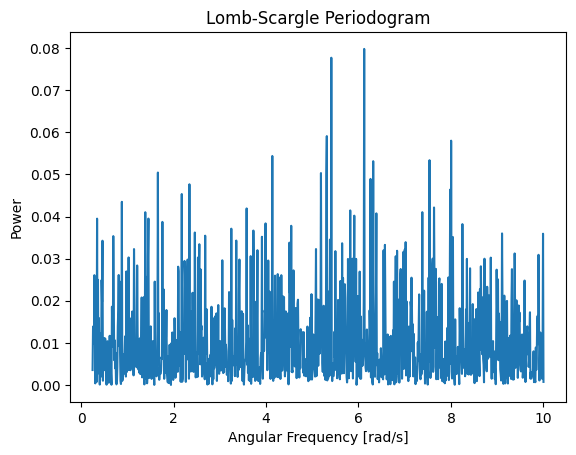

In [33]:
# LombScargle periodogram with scipy
from scipy.signal import lombscargle

w_f = np.linspace(0.25, 10, 1002)

pgram_power_f = lombscargle(time_R_peaks[1:], RR_signal, w_f, normalize=False, floating_mean=True)

plt.plot(w_f, pgram_power_f)
plt.title("Lomb-Scargle Periodogram")
plt.xlabel("Angular Frequency [rad/s]")
plt.ylabel("Power")

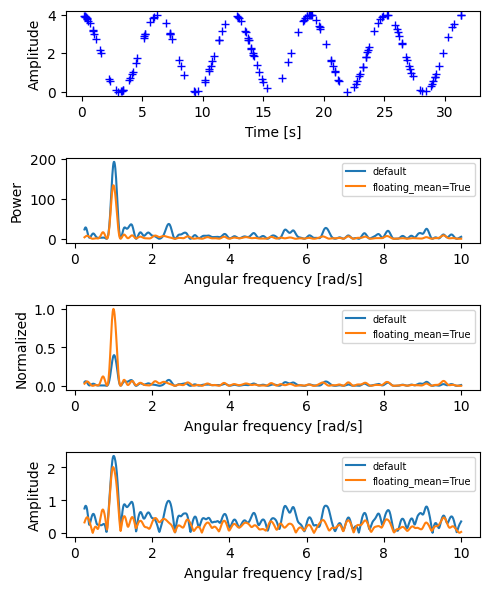

In [ ]:
'''
The library scipy already has a function to compute the Lomb-Scargle periodogram. The implementation follows the
least-squares method and interpretation, by fitting a sinusoid model to each frequency value. 
'''

rng = np.random.default_rng()

A = 2.  # amplitude
c = 2.  # offset
w0 = 1.  # rad/sec
nin = 150
nout = 1002

x = rng.uniform(0, 10*np.pi, nin)
y = A * np.cos(w0*x) + c
w = np.linspace(0.25, 10, nout)

pgram_power = lombscargle(x, y, w, normalize=False)
pgram_norm = lombscargle(x, y, w, normalize=True)
pgram_amp = lombscargle(x, y, w, normalize='amplitude')
pgram_power_f = lombscargle(x, y, w, normalize=False, floating_mean=True)
pgram_norm_f = lombscargle(x, y, w, normalize=True, floating_mean=True)
pgram_amp_f = lombscargle(x, y, w, normalize='amplitude', floating_mean=True)

fig, (ax_t, ax_p, ax_n, ax_a) = plt.subplots(4, 1, figsize=(5, 6))
ax_t.plot(x, y, 'b+')
ax_t.set_xlabel('Time [s]')
ax_t.set_ylabel('Amplitude')

ax_p.plot(w, pgram_power, label='default')
ax_p.plot(w, pgram_power_f, label='floating_mean=True')
ax_p.set_xlabel('Angular frequency [rad/s]')
ax_p.set_ylabel('Power')
ax_p.legend(prop={'size': 7})
ax_n.plot(w, pgram_norm, label='default')
ax_n.plot(w, pgram_norm_f, label='floating_mean=True')
ax_n.set_xlabel('Angular frequency [rad/s]')
ax_n.set_ylabel('Normalized')
ax_n.legend(prop={'size': 7})
ax_a.plot(w, np.abs(pgram_amp), label='default')
ax_a.plot(w, np.abs(pgram_amp_f), label='floating_mean=True')
ax_a.set_xlabel('Angular frequency [rad/s]')
ax_a.set_ylabel('Amplitude')
ax_a.legend(prop={'size': 7})
plt.tight_layout()
plt.show()

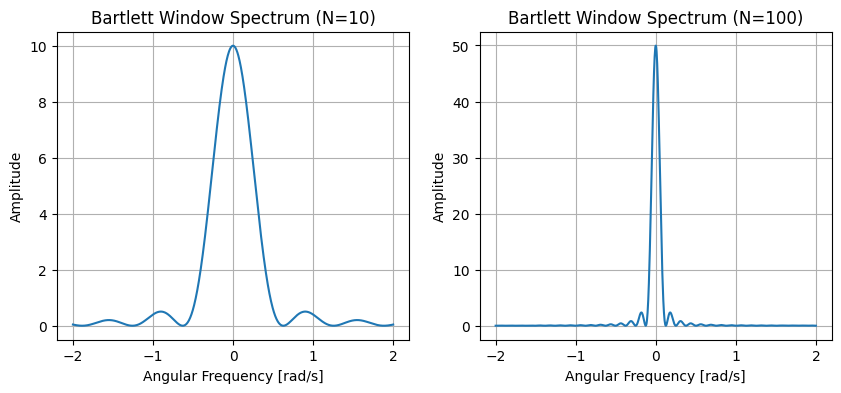

In [31]:
# bartlett window

N = 10
x = np.linspace(-2, 2, 1000)
y = (1.0 / N) * (np.sin((x * N) / 2.0) / np.sin(x / 2.0)) ** 2

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(x, y)
axs[0].set_title("Bartlett Window Spectrum (N=10)")
axs[0].set_xlabel("Angular Frequency [rad/s]")
axs[0].set_ylabel("Amplitude")
axs[0].grid()

N = 50
y = (1.0 / N) * (np.sin((x * N) / 2.0) / np.sin(x / 2.0)) ** 2

axs[1].plot(x, y)
axs[1].set_title("Bartlett Window Spectrum (N=100)")
axs[1].set_xlabel("Angular Frequency [rad/s]")
axs[1].set_ylabel("Amplitude")
axs[1].grid()

plt.show()